- NumPy 数组运算通常是逐元素（element-by-element ）计算，因此要求两个数组的形状必须相同
- NumPy 的 Broadcasting 机制解除了这种限制，在两个数组的形状满足某种条件的情况下，不同形状的数组之间仍可以进行算术运算

### Broadcast
广播(Broadcast)是 numpy 对不同形状(shape)的数组进行数值计算的方式， 对数组的算术运算通常在相应的元素上进行。

- 4x3 的二维数组与长为 3 的一维数组相加，等效于把数组 b 在二维上重复 4 次再运算
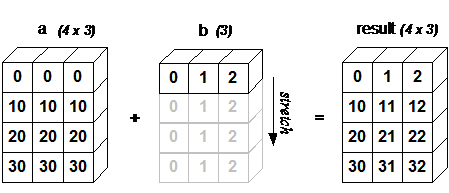

#### 规则
如果两个数组的后缘维度(即：从末尾开始算起的维度)的轴长相符或其中一方的长度为1，则认为它们是广播兼容的，广播会在缺失和(或)长度为1的轴上进行
- 数组与标量数字之间的运算就存在广播
- 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐 
- 输出数组的shape是输入数组shape的各个轴上的最大值 
- 如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错

#### 简单理解
当操作两个array时，numpy会逐个比较它们的shape（构成的元组tuple），只有在下述情况下，两arrays才算兼容：
- 相等
- 其中一个为1，（进而可进行拷贝拓展,已至shape匹配）
    - 当不满足时，会抛出 ValueError: frames are not aligne 异常

In [1]:
import numpy as np

#### 相同shape的数组

In [2]:
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])
c = a * b
print(c)

[ 10  40  90 160]


#### 不同shape的数组

In [27]:
a = np.array([[ 0, 0, 0],
           [10,10,10],
           [20,20,20],
           [30,30,30]])
print(a.shape)
b = np.array([1,2,3])
print(b.shape)
print(a + b)
print(a * b)

(4, 3)
(3,)
[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]
[[ 0  0  0]
 [10 20 30]
 [20 40 60]
 [30 60 90]]


In [6]:
arr = np.arange(5)
print(arr)
arr + 5

[0 1 2 3 4]


array([5, 6, 7, 8, 9])

#### 同时在两个轴广播

In [8]:
arr1 = np.array([[0], [1], [2], [3]])
print(arr1.shape)
arr2 = np.array([1, 2, 3])
print(arr2.shape)
arr3 = arr1 + arr2
print(arr3)
print(arr3.shape)

(4, 1)
(3,)
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]
(4, 3)


#### 三轴广播

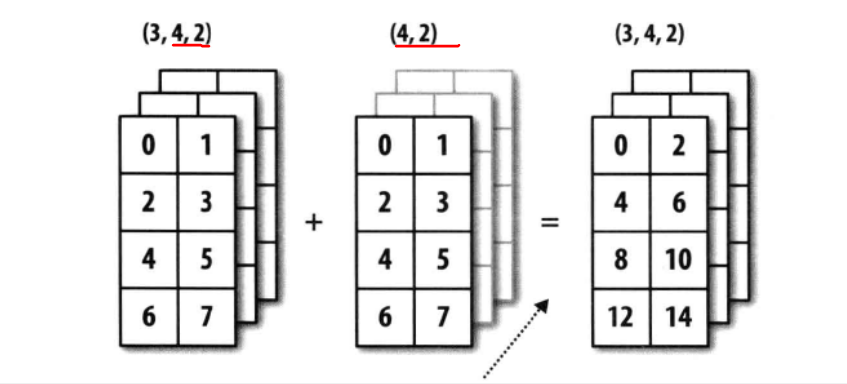
arr1的shape为(3,4,2),arr2的shape为(4,2)，它们的后缘轴长度都为(4,2)，所以可以在0轴进行广播，arr2的shape变为(3,4,2)

#### 易错实例

In [19]:
arr = np.random.randn(4, 3)
print(arr)
print(arr.shape)

[[ 1.13305454  2.08907413  0.5089595 ]
 [ 0.53341179  0.35727923 -1.42231409]
 [ 0.09725977  1.2709542  -0.74883202]
 [-1.75304635  1.01225737 -0.02020702]]
(4, 3)


In [20]:
arr1 = arr.mean(1)
print(arr1)
print(arr1.shape)

[ 1.24369606 -0.17720769  0.20646065 -0.25366533]
(4,)


In [22]:
# 不能运算
arr + arr1

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [24]:
# 因为arr.mean(1)产生的shape为(4,)，根据广播原则，较小的数组的后缘维度必须为1，所以需要将arr.mean变成(4,1)
arr + arr1.reshape((4,1))

array([[ 2.3767506 ,  3.33277019,  1.75265556],
       [ 0.35620411,  0.18007154, -1.59952178],
       [ 0.30372042,  1.47741486, -0.54237136],
       [-2.00671168,  0.75859203, -0.27387235]])